In [1]:
from keras.applications.xception import Xception
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size = 32

In [3]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
test_data = ImageDataGenerator(rescale=1./255)

In [5]:
train = train_data.flow_from_directory('train', target_size=(150,150), batch_size=batch_size, class_mode='binary')

Found 20000 images belonging to 2 classes.


In [6]:
test = test_data.flow_from_directory('test', target_size=(150,150), batch_size=batch_size, class_mode='binary')

Found 5000 images belonging to 2 classes.


In [7]:
model_base = Xception(weights='imagenet',include_top=False, input_shape=(150,150,3))

2023-12-10 02:10:32.256005: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-10 02:10:32.256041: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-10 02:10:32.256049: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-10 02:10:32.256088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-10 02:10:32.256103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]

                                                                                                  
 block4_sepconv2_act (Activ  (None, 18, 18, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 18, 18, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 18, 18, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv2d_2 

                                                                                                  
 block7_sepconv1 (Separable  (None, 9, 9, 728)            536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 9, 9, 728)            2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 9, 9, 728)            0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block7_se

 ormalization)                                                                                    
                                                                                                  
 add_7 (Add)                 (None, 9, 9, 728)            0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_6[0][0]']               
                                                                                                  
 block10_sepconv1_act (Acti  (None, 9, 9, 728)            0         ['add_7[0][0]']               
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 9, 9, 728)            536536    ['block10_sepconv1_act[0][0]']
 eConv2D)                                                                                         
          

 block12_sepconv3_act (Acti  (None, 9, 9, 728)            0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 9, 9, 728)            536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 9, 9, 728)            2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_10 (Add)                (None, 9, 9, 728)            0         ['block12_sepconv3_bn[0][0]', 
          

In [9]:
model_base.trainable = True

set_trainable = False

for layer in model_base.layers:
    if layer.name.startswith('block14_'):
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
for layer in model_base.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv1_bn False
block1_conv1_act False
block1_conv2 False
block1_conv2_bn False
block1_conv2_act False
block2_sepconv1 False
block2_sepconv1_bn False
block2_sepconv2_act False
block2_sepconv2 False
block2_sepconv2_bn False
conv2d False
block2_pool False
batch_normalization False
add False
block3_sepconv1_act False
block3_sepconv1 False
block3_sepconv1_bn False
block3_sepconv2_act False
block3_sepconv2 False
block3_sepconv2_bn False
conv2d_1 False
block3_pool False
batch_normalization_1 False
add_1 False
block4_sepconv1_act False
block4_sepconv1 False
block4_sepconv1_bn False
block4_sepconv2_act False
block4_sepconv2 False
block4_sepconv2_bn False
conv2d_2 False
block4_pool False
batch_normalization_2 False
add_2 False
block5_sepconv1_act False
block5_sepconv1 False
block5_sepconv1_bn False
block5_sepconv2_act False
block5_sepconv2 False
block5_sepconv2_bn False
block5_sepconv3_act False
block5_sepconv3 False
block5_sepconv3_bn False
add_3 False
bl

In [10]:
model_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]

                                                                                                  
 block4_sepconv2_act (Activ  (None, 18, 18, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 18, 18, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 18, 18, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv2d_2 

                                                                                                  
 block7_sepconv1 (Separable  (None, 9, 9, 728)            536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 9, 9, 728)            2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 9, 9, 728)            0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block7_se

 ormalization)                                                                                    
                                                                                                  
 add_7 (Add)                 (None, 9, 9, 728)            0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_6[0][0]']               
                                                                                                  
 block10_sepconv1_act (Acti  (None, 9, 9, 728)            0         ['add_7[0][0]']               
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 9, 9, 728)            536536    ['block10_sepconv1_act[0][0]']
 eConv2D)                                                                                         
          

 block12_sepconv3_act (Acti  (None, 9, 9, 728)            0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 9, 9, 728)            536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 9, 9, 728)            2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_10 (Add)                (None, 9, 9, 728)            0         ['block12_sepconv3_bn[0][0]', 
          

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D

In [12]:
model = Sequential()

In [13]:
model.add(model_base)
model.add(Flatten())
model.add(Dense(90,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
hist = model.fit_generator(train, epochs=5, validation_data=test)

Epoch 1/5


/var/folders/w8/sx8jqns925b45pxmz29f2qxr0000gn/T/ipykernel_3554/4246539990.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, epochs=5, validation_data=test)
2023-12-10 02:10:34.838744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 95s 149ms/step - loss: 0.1324 - accuracy: 0.9490 - val_loss: 0.0863 - val_accuracy: 0.9618
Epoch 2/5
625/625 [==============================] - 92s 147ms/step - loss: 0.1100 - accuracy: 0.9588 - val_loss: 0.2408 - val_accuracy: 0.9386
Epoch 3/5
625/625 [==============================] - 92s 147ms/step - loss: 0.1010 - accuracy: 0.9604 - val_loss: 0.1434 - val_accuracy: 0.9508
Epoch 4/5
625/625 [==============================] - 92s 147ms/step - loss: 0.0987 - accuracy: 0.9599 - val_loss: 0.1214 - val_accuracy: 0.9560
Epoch 5/5
625/625 [==============================] - 92s 147ms/step - loss: 0.0965 - accuracy: 0.9614 - val_loss: 0.0863 - val_accuracy: 0.9660


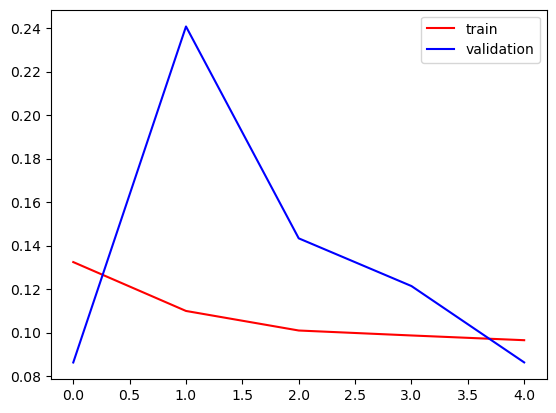

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],color='red',label='train')
plt.plot(hist.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

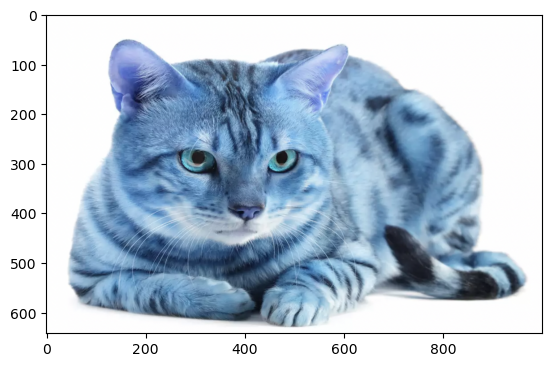

In [18]:
test = cv2.imread('cat1.png')
plt.imshow(test)

In [30]:
test = cv2.imread('cat2.png')
test = cv2.resize(test, (150,150))
test = test.reshape((1,150,150,3))

In [31]:
print(model.predict(test))
# if model.predict(test) == 1:
#     print("Dog")
# elif model.predict(test) == 0:
#     print("Cat")

1/1 [==============================] - 0s 35ms/step
[[1.]]
